In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from dataset import Dataset
from model import Model

scale = 5.0
dataset = Dataset(scale=scale)
model = Model()
model.load("saved")

loaded: saved


In [4]:
k1 = model.k1
level2_lr_scale = 10.0

iteration = model.iteration

sigma_sq    = model.sigma_sq    # Iの生成観測分布の分散
sigma_sq_td = model.sigma_sq_td # rの生成観測分布の分散
alpha1      = model.alpha1 # rの事前分布の精度パラメータ  (分散=1.0, 標準偏差1.0)
alpha2      = model.alpha2 # rhの事前分布の精度パラメータ (分散=20.0, 標準偏差4.5)
lambd       = model.lambd  # Uの事前分布の精度パラメータ　(分散=50.0, 標準偏差7.1)

Us  = model.Us
Uh  = model.Uh

rs  = np.zeros([96],  dtype=np.float32)
rh  = np.zeros([128], dtype=np.float32)

error_tds = np.zeros([96], dtype=np.float32)

images = dataset.get_images(0)
    
for i in range(iteration):
    r_tds = Uh.dot(rh)

    for j in range(3):
        I = images[j]
        r    = rs[32*j:32*(j+1)]
        r_td = r_tds[32*j:32*(j+1)]
        U = Us[j]
        Ur = U.dot(r)
        error    = I - Ur
        error_td = r_td - r
        dr = (k1 / sigma_sq) * U.T.dot(error) + (k1/sigma_sq_td) * error_td - k1 * alpha1 * r
        rs[32*j:32*(j+1)] += dr
        error_tds[32*j:32*(j+1)] = error_td

    drh = (k1*level2_lr_scale / sigma_sq_td) * Uh.T.dot(-error_tds) - k1*level2_lr_scale * alpha2 * rh
    rh += drh

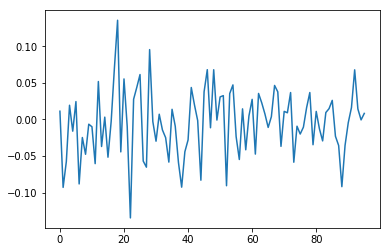

In [5]:
plt.plot(rs)
plt.show()

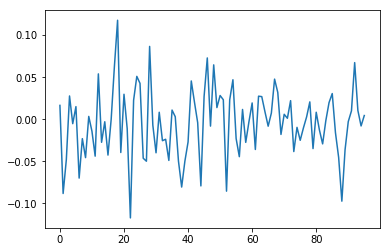

In [6]:
plt.plot(r_tds)
plt.show()

In [7]:
dr0 = (k1/sigma_sq) * U.T.dot(error)
dr1 = (k1/sigma_sq_td) * error_td
dr2 = - k1 * alpha1 * r

drh0 = (k1 / sigma_sq_td) * Uh.T.dot(-error_tds)
drh1 = - k1 * alpha2 * rh

以前はU.Tのが大きくて、drの第一項の影響が大きく、error_tdが大きくてもこれを小さくしようとする力が働いていなかった

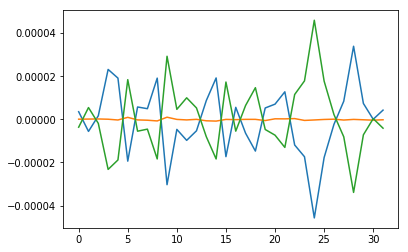

In [8]:
plt.plot(dr0) # 
plt.plot(dr1)
plt.plot(dr2)
plt.show()

以前はerror_tdsの項により、r_tdをrに近づけようとrhを変更しようとする力は働いているが、Uhが小さいので変更幅が小さかった

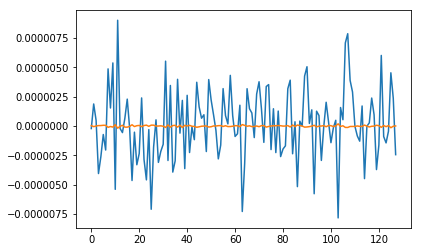

In [9]:
plt.plot(drh0)
plt.plot(drh1)
plt.show()

In [58]:
error_tds

array([ 0.01749003,  0.0070837 ,  0.00849266, -0.01187283,  0.00659723,
        0.00118177,  0.0049588 , -0.01030437, -0.0184904 ,  0.01309814,
       -0.00736317,  0.01471364, -0.01750446,  0.02300539,  0.00928388,
        0.01197447,  0.01928242, -0.01183846, -0.03174476, -0.0061737 ,
       -0.00833251,  0.00041935, -0.01273117, -0.00405138,  0.01378612,
       -0.00015809, -0.01265513, -0.01764412,  0.02908474, -0.01328109,
        0.0088181 , -0.00639419,  0.01269303, -0.00796185,  0.00453273,
        0.0123819 , -0.00082229,  0.00580654,  0.00884594,  0.00814553,
        0.00576616, -0.00225159, -0.00291046,  0.00748062, -0.01462626,
        0.00328933,  0.00379814, -0.00191131, -0.01089376, -0.01546587,
       -0.0012805 , -0.00304899,  0.01108984,  0.0070306 ,  0.00172461,
        0.00676603, -0.00412469,  0.0033588 ,  0.00200044, -0.01036976,
        0.00503005,  0.0056876 , -0.00247593,  0.00655209, -0.01960184,
        0.0033132 , -0.0028144 , -0.00493566, -0.01312905, -0.00

In [59]:
U.T.dot(error)

array([ 0.85280739, -0.11579635,  0.1456164 ,  0.23038979,  0.50220015,
        0.39950562,  0.17847548,  0.16099574,  0.12844744,  0.49753949,
        0.25168711, -0.1469201 ,  0.28617607,  0.40199265, -0.01475633,
        0.42950747,  0.08448376,  0.5665774 , -0.2697594 ,  0.35562433,
       -0.20483767,  0.30251715, -0.73835204,  0.17682315, -0.18689893,
        0.19921475,  0.40095411,  0.26063557,  0.25262853,  0.04363123,
       -0.16252617,  0.54101658])